In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
import descartes as ds
from matplotlib.collections import PatchCollection

https://borealperspectives.org/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/

In [2]:
ews_fp = '/home/jupyterlab/data/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_EW_BFC_v3.shp'

In [3]:

ews_df = gp.GeoDataFrame.from_file(ews_fp)
ews_df.head()

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,City of London 001A,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18..."
1,2,E01000002,City of London 001B,City of London 001B,228419.333099,2708.052040,"POLYGON ((532267.728 181643.781, 532262.875 18..."
2,3,E01000003,City of London 001C,City of London 001C,59054.013168,1224.770897,"POLYGON ((532105.312 182010.574, 532104.872 18..."
3,4,E01000005,City of London 001E,City of London 001E,189577.165154,2275.832056,"POLYGON ((533610.974 181410.968, 533615.622 18..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,146536.520470,1966.162225,"POLYGON ((544817.826 184346.261, 544815.791 18..."


<AxesSubplot:>

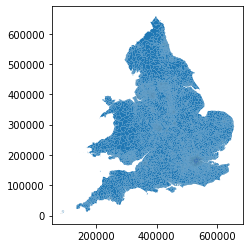

In [4]:
ews_df.plot()

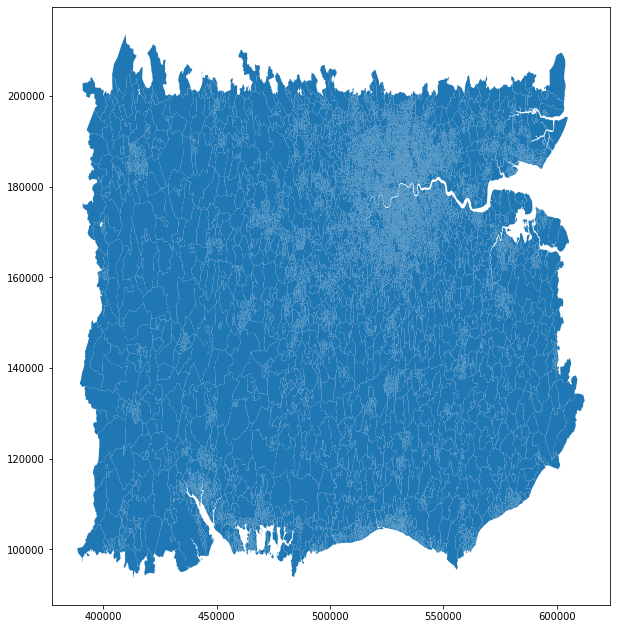

In [5]:
import shapely
studyarea = shapely.geometry.box(400000., 100000., 600000., 200000.)
ax1 = ews_df[ews_df.geometry.intersects(studyarea)].plot()
ax1.set_aspect(2)
fig = plt.gcf()
fig.set_size_inches(10, 15)

https://borealperspectives.org/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/

In [6]:
from mpl_toolkits.basemap import Basemap
import numpy as np
water = 'lightskyblue'
earth = 'cornsilk'

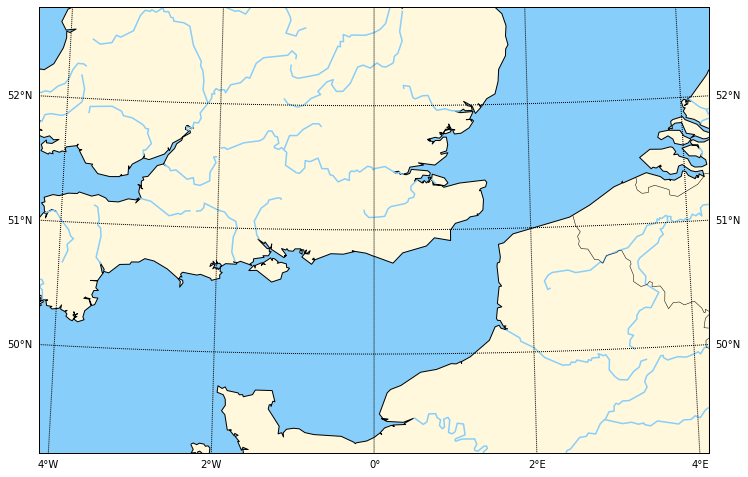

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000,
    resolution='i',
    projection='aea',
    ellps='WGS84',
    lat_1=50., lat_2=52.,
    lat_0=51., lon_0=0)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, 80), 
    labels=[True, True, False, False])
patches = []
selection = ews_df[ews_df.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(mm, poly)
        patches.append(ds.PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(mm, poly)
            patches.append(ds.PolygonPatch(mpoly))
    else:
        print(poly, 'is neither a polygon nor a multi-polygon. Skipping it')
ews = ax1.add_collection(
    PatchCollection(patches, match_original=True))

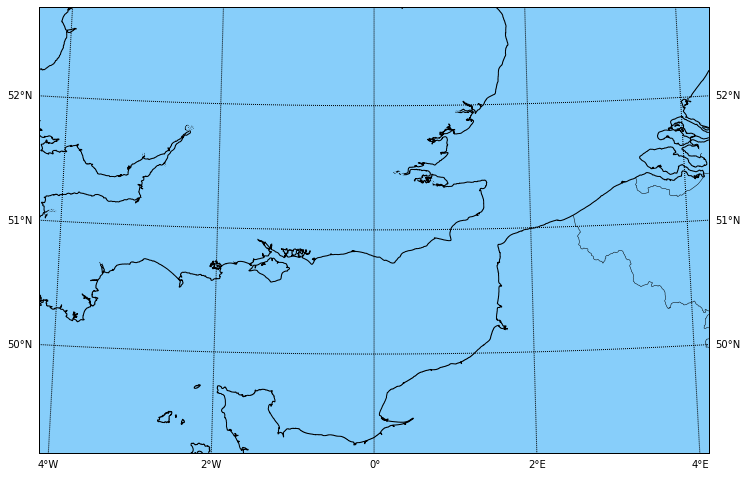

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000, 
    resolution='f', 
    projection='aea',
    ellps='WGS84',
    lat_1=50., lat_2=52.,
    lat_0=51., lon_0=0)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(        
    color=earth,
    lake_color=water,
    zorder=0)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(np.arange(-180, 180, 2), labels=[False, False, False, True])
parall = mm.drawparallels(np.arange(0, 80), labels=[True, True, False, False])
patches = []
selection = ews_df[ews_df.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(mm, poly)
        patches.append(ds.PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(mm, subpoly)
            patches.append(ds.PolygonPatch(mpoly))
    else:
        print(poly, 'is neither a polygon nor a multi-polygon. Skipping it')
ews = ax1.add_collection(PatchCollection(patches, match_original=True))

https://www.kaggle.com/daveianhickey/using-basemap-for-geographical-data

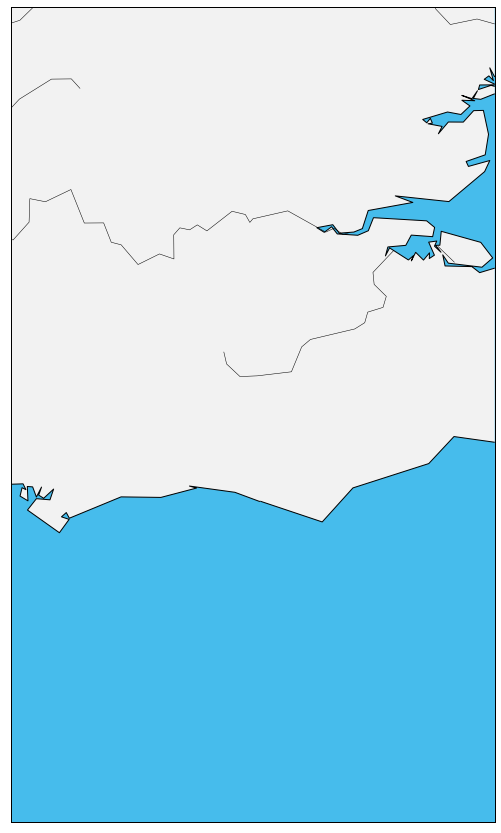

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
m = Basemap(#llcrnrlon=-7.5600,llcrnrlat=49.7600,
            #urcrnrlon=2.7800,urcrnrlat=60.840,
            llcrnrlon=-1,llcrnrlat=50,
            urcrnrlon=1,urcrnrlat=52,
            resolution='i', # Set using letters, e.g. c is a crude drawing,i is intermediate,  f is a full detailed drawing
            projection='tmerc', # The projection style is what gives us a 2D view of the world for this
            ##lon_0=-4.36,lat_0=54.7, # Setting the central point of the image
            lon_0=0,lat_0=51,
            epsg=27700) # Setting the coordinate system we're using

m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
m.drawcoastlines()
m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()


plt.show()

https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

https://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued/

In [ ]:
#
# BaseMap example by geophysique.be
# tutorial 10

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### PARAMETERS FOR MATPLOTLIB :
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.

fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 15.
y1 = 45.
y2 = 54.

m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians

from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile

r = shapefile.Reader(ews_fp)
shapes = r.shapes()
records = r.records()

for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T

    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])

    lines = LineCollection(segs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)

plt.savefig('tutorial10.png',dpi=300)
plt.show()